<a href="https://colab.research.google.com/github/maryofcarmo/AULA01/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# conecta o notebook ao google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# inicia chamando todas as bibliotecas necessárias
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# Leitura e armazenamento das informações dos arquivos CSVs em um dicionśrio de dataframes
Um loop pra ler todos os arquivos da pasta de usinas convencionais

In [3]:
# Defina o diretório onde estão os arquivos CSV
diretorio = '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL'

# Obtenha a lista de todos os arquivos CSV no diretório
arquivos_csv = [f for f in os.listdir(diretorio) if f.endswith('.csv')]

In [4]:
# dicionário para armazenar os DataFrames
dataframes = {}

In [6]:
# Loop para ler cada arquivo CSV e armazenar no dicionário
for arquivo in arquivos_csv:

    caminho_completo = os.path.join(diretorio, arquivo)

    #obtem o nome do arquivo sem a sua extensão e coloca na variável 'nome_df'
    nome_df = os.path.splitext(arquivo)[0]

    '''lê o dataframe pelo caminho do arquivo completo,delimitado por ponto e
    vírgula (CSV) e exclui da leitura as 10 primeiras linhas do arquivo
    com essa informação joga na variável 'dataframes[nome_df]'''
    dataframes[nome_df] = pd.read_csv(caminho_completo, delimiter=';', skiprows=10)


In [8]:
# Verifique o conteúdo de um dos DataFrames para garantir que funcionou
# O DATAFRAME escolhido para verificar tem o nome de 'dados_82976_M_2000-01-01_2021-07-31'

#print(dataframes['dados_82976_M_2000-01-01_2021-07-31'].head)

# 1° Construindo as Séries Temporais

In [9]:
# Especificando as colunas de interesse
colunas_interesse = ['PRECIPITACAO TOTAL, MENSAL(mm)', 'INSOLACAO TOTAL, MENSAL(h)', 'VENTO, VELOCIDADE MEDIA MENSAL(m/s)']

# Função para transformar DataFrame em série temporal
def transformar_em_serie_temporal(df, colunas):
    # Selecionar as colunas de interesse copiando-as e jogando em um novo df
    df_temporal = df[colunas].copy()

    # Garantir que o índice seja do tipo datetime, se ainda não for
    '''
    "df_temporal.index" é o index da série temporal

    "pd.api.types.is_datetime64_any_dtype" é uma função do pandas que verifica se um
    objeto é de qualquer dtype relacionado a datetime (datetime64[ns], datetime64[nstz], etc.).

    "not": Negação lógica. A condição verifica se o índice não é do tipo datetime.

    "pd.to_datetime(df_temporal.index)": converte o índice para o tipo datetime.
    caso ele não seja.
    '''
    if not pd.api.types.is_datetime64_any_dtype(df_temporal.index):
        df_temporal.index = pd.to_datetime(df_temporal.index)

    return df_temporal

In [10]:
 #Aplicando a transformação para cada DataFrame no dicionário

'''
Esta linha de código é uma compreensão de dicionário (dictionary comprehension)
que aplica a função transformar_em_serie_temporal a cada DataFrame em um dicionário
de DataFrames (dataframes). O resultado é um novo dicionário (series_temporais)
onde cada DataFrame foi transformado conforme especificado.
'''

series_temporais = {nome: transformar_em_serie_temporal(df, colunas_interesse) for nome, df in dataframes.items()}

In [14]:
# Exibir as séries temporais resultantes

'''
loop que pega primeiro o nome da série e depois a série em si, dentro o dicionário
de séries temporais (series_temporais). E exibe apenas as primeiras 5 linhas (.head)

'''
for nome, serie in series_temporais.items():
  print(f"Série Temporal para {nome}:\n", serie.head(), "\n")

Série Temporal para dados_82989_M_2000-01-01_2024-06-01:
            PRECIPITACAO TOTAL, MENSAL(mm) INSOLACAO TOTAL, MENSAL(h)  \
2000-01-31                          941,8                        5,5   
2000-02-29                          943,4                        5,8   
2000-03-31                          942,3                        6,3   
2000-04-30                          943,5                        6,9   
2000-05-31                            945                        6,4   

           VENTO, VELOCIDADE MEDIA MENSAL(m/s)  
2000-01-31                                  70  
2000-02-29                                  69  
2000-03-31                                  70  
2000-04-30                                69,2  
2000-05-31                                63,7   

Série Temporal para dados_82995_M_2000-01-01_2024-06-01:
             PRECIPITACAO TOTAL, MENSAL(mm)  INSOLACAO TOTAL, MENSAL(h)  \
2000-01-31                             NaN                         NaN   
2000-02

In [15]:
# pego uma série temporal aleatória e exibo ela com a função print.
series_temporais['dados_82976_M_2000-01-01_2021-07-31']

,"PRECIPITACAO TOTAL, MENSAL(mm)","INSOLACAO TOTAL, MENSAL(h)","VENTO, VELOCIDADE MEDIA MENSAL(m/s)"
2000-01-31,"951,4","7,1","36,1"
2000-02-29,"952,5","6,5","37,4"
2000-03-31,"951,2",6,"36,7"
2000-04-30,"952,2","6,8","37,1"
2000-05-31,"953,4","4,3","36,7"
...,...,...,...
2021-03-31,"953,8","7,2",70
2021-04-30,"954,3","6,6",70
2021-05-31,"955,6",5,70
2021-06-30,956,"4,5",98


In [17]:
# verifico o tipo de variável das colunas de uma série aleatória
# dentro do dicionário de series temporais
series_temporais['dados_82976_M_2000-01-01_2021-07-31'].dtypes

,0
"PRECIPITACAO TOTAL, MENSAL(mm)",object
"INSOLACAO TOTAL, MENSAL(h)",object
"VENTO, VELOCIDADE MEDIA MENSAL(m/s)",object


# 2° Substituindo tipo "object" para tipo "float"

In [22]:
colunas = ['PRECIPITACAO TOTAL, MENSAL(mm)', 'INSOLACAO TOTAL, MENSAL(h)', 'VENTO, VELOCIDADE MEDIA MENSAL(m/s)']

for nome_serie, df in series_temporais.items():  # chave:nome_serie, valor: df
  for coluna in colunas:
    #linha que sbstitui cada vírgula presente em cada coluna por ponto
    df[coluna] = df[coluna].astype(str).str.replace(',', '.')
    # linha que transforma cada coluna em variável do tipo float
    df[coluna] = df[coluna].astype(float)

In [23]:
# verifico o tipo de variável das colunas de uma série aleatória
series_temporais['dados_82695_M_2000-01-01_2008-08-29'].dtypes

,0
"PRECIPITACAO TOTAL, MENSAL(mm)",float64
"INSOLACAO TOTAL, MENSAL(h)",float64
"VENTO, VELOCIDADE MEDIA MENSAL(m/s)",float64


# 3° Limpeza das Séries Temporais

In [24]:
# Função para limpeza de séries temporais
def limpar_serie_temporal(serie):

    # Remover valores ausentes
    serie_limpa = serie.dropna()

    '''
    Esta linha de código está filtrando o DataFrame serie_limpa para remover
    quaisquer linhas que contenham valores negativos em qualquer uma das colunas.

    'serie_limpa >= 0'  Verificar se cada valor no DataFrame serie_limpa é maior ou igual a zero.

    '(serie_limpa >= 0).all(axis=1)' Verificar se todas as condições (valores >= 0)
    são verdadeiras ao longo das colunas para cada linha.

    'axis=1' Especifica que a operação deve ser realizada ao longo das colunas
    (para cada linha).

    '''
    serie_limpa = serie_limpa[(serie_limpa >= 0).all(axis=1)]

    return serie_limpa

In [25]:
# Aplicar a função de limpeza a cada série temporal no dicionário
series_temporais_limpas = {nome: limpar_serie_temporal(serie) for nome, serie in series_temporais.items()}

In [26]:
# Exibir as séries temporais limpas resultantes
for nome, serie_limpa in series_temporais_limpas.items():
    print(f"Série Temporal Limpa para {nome}:\n", serie_limpa.head(), "\n")

Série Temporal Limpa para dados_82989_M_2000-01-01_2024-06-01:
             PRECIPITACAO TOTAL, MENSAL(mm)  INSOLACAO TOTAL, MENSAL(h)  \
2000-01-31                           941.8                         5.5   
2000-02-29                           943.4                         5.8   
2000-03-31                           942.3                         6.3   
2000-04-30                           943.5                         6.9   
2000-05-31                           945.0                         6.4   

            VENTO, VELOCIDADE MEDIA MENSAL(m/s)  
2000-01-31                                 70.0  
2000-02-29                                 69.0  
2000-03-31                                 70.0  
2000-04-30                                 69.2  
2000-05-31                                 63.7   

Série Temporal Limpa para dados_82995_M_2000-01-01_2024-06-01:
 Empty DataFrame
Columns: [PRECIPITACAO TOTAL, MENSAL(mm), INSOLACAO TOTAL, MENSAL(h), VENTO, VELOCIDADE MEDIA MENSAL(m/s)]
In

Verificações para Confirmar que o DataFrame Contém Séries Temporais

In [ ]:
#df = series_temporais['dados_82976_M_2000-01-01_2021-07-31']

# Verificando se o DataFrame possui um índice do tipo DatetimeIndex
is_time_series_index = isinstance(df.index, pd.DatetimeIndex)

# Verificando se todas as colunas contêm dados numéricos
are_columns_numeric = df.apply(lambda s: pd.api.types.is_numeric_dtype(s))

# Verificação adicional da consistência do índice de datas
is_index_monotonic = df.index.is_monotonic_increasing

print(f"O DataFrame tem um índice DatetimeIndex: {is_time_series_index}")
print(f"Todas as colunas contêm dados numéricos: {are_columns_numeric.all()}")
print(f"O índice de datas é monotônico e crescente: {is_index_monotonic}")

if is_time_series_index and are_columns_numeric.all() and is_index_monotonic:
    print("O DataFrame contém várias colunas de séries temporais.")
else:
    print("O DataFrame não parece conter várias colunas de séries temporais.")

O DataFrame tem um índice DatetimeIndex: True
Todas as colunas contêm dados numéricos: True
O índice de datas é monotônico e crescente: True
O DataFrame contém várias colunas de séries temporais.


# 4° Criando ano característico

Agrupar por Mês e Calcular a Média

In [29]:
#crio um dicionário para armazenar o ano característico de cada série
ano_caracteristico = {}

# series_temporais_limpas é um dicionário
for nome_serie, serie in series_temporais_limpas.items(): # chave:nome_serie, valor:serie

  #pega cada série limpa individualmente e joga na variável df
  df = series_temporais_limpas[nome_serie]

  # agrupa esse df por cada mês e faz a média
  df_ano_caracteristico = df.groupby(df.index.month).mean()

  # joga esse agrupamento por mês de cada série no dicionário criado para o ano característico
  ano_caracteristico[nome_serie] = df_ano_caracteristico

In [30]:
# Exibir o ano característico das séries temporais limpas resultantes
for nome_serie, serie in ano_caracteristico.items():
    print(f"Ano característico para a Série Temporal: {nome}:\n", serie.head(), "\n")

Ano característico para a Série Temporal: dados_83097_M_2000-01-01_2024-06-01:
    PRECIPITACAO TOTAL, MENSAL(mm)  INSOLACAO TOTAL, MENSAL(h)  \
1                      944.895455                    5.000000   
2                      944.736364                    5.354545   
3                      944.952174                    5.452174   
4                      945.445833                    5.925000   
5                      946.768182                    7.400000   

   VENTO, VELOCIDADE MEDIA MENSAL(m/s)  
1                            75.745455  
2                            73.727273  
3                            75.021739  
4                            73.395833  
5                            64.945455   

Ano característico para a Série Temporal: dados_83097_M_2000-01-01_2024-06-01:
 Empty DataFrame
Columns: [PRECIPITACAO TOTAL, MENSAL(mm), INSOLACAO TOTAL, MENSAL(h), VENTO, VELOCIDADE MEDIA MENSAL(m/s)]
Index: [] 

Ano característico para a Série Temporal: dados_83097_M_2000-01-01

In [32]:
# exibindo apenas um ano característico de uma estação metereológica
ano_caracteristico['dados_83097_M_2000-01-01_2024-06-01']

,"PRECIPITACAO TOTAL, MENSAL(mm)","INSOLACAO TOTAL, MENSAL(h)","VENTO, VELOCIDADE MEDIA MENSAL(m/s)"
1,1009.704000,4.340000,56.948000
2,1009.460000,4.464000,55.160000
3,1009.332000,4.384000,55.392000
4,1009.820000,4.592000,55.096000
5,1011.444000,5.268000,54.416000
6,1013.500000,5.275000,52.441667
7,1014.587500,5.429167,52.562500
8,1014.762500,4.979167,52.758333
9,1013.712500,4.508333,53.025000
10,1011.566667,3.958333,53.137500


# 5° Calculo dos Coeficientes de Correlação

Correlação de Person

In [39]:
# Dicionário para armazenar os coeficientes de Pearson
pearson_results = {}

# Loop para iterar sobre cada DataFrame no dicionário
for nome_serie, serie in ano_caracteristico.items():
    # Calculando o coeficiente de Pearson entre cada par de colunas
    pearson_matrix = serie.corr(method='pearson')

    # Armazenar os resultados no dicionário
    pearson_results[nome_serie] = pearson_matrix

In [ ]:
# Exibir os resultados
for nome_serie, pearson_matrix in pearson_results.items():
    print(f"Coeficientes de Pearson para o DataFrame {nome_serie}:")
    print(pearson_matrix)
    print()

In [46]:
# Exemplo de como acessar uma das matrizes de correlação de person resultante
pearson_results['dados_82198_M_2000-01-01_2024-06-01']

,"PRECIPITACAO TOTAL, MENSAL(mm)","INSOLACAO TOTAL, MENSAL(h)","VENTO, VELOCIDADE MEDIA MENSAL(m/s)"
"PRECIPITACAO TOTAL, MENSAL(mm)",1.000000,-0.386010,0.092499
"INSOLACAO TOTAL, MENSAL(h)",-0.386010,1.000000,0.530314
"VENTO, VELOCIDADE MEDIA MENSAL(m/s)",0.092499,0.530314,1.000000


Coeficiente de Kendall

In [44]:
# Dicionário para armazenar os coeficientes de Kendall
kendall_results = {}

# Loop para iterar sobre cada DataFrame no dicionário
for nome_serie, serie in ano_caracteristico.items():
    # Calculando o coeficiente de Pearson entre cada par de colunas
    kendall_matrix = serie.corr(method='kendall')

    # Armazenar os resultados no dicionário
    kendall_results[nome_serie] = kendall_matrix

In [ ]:
# Exibir os resultados
for nome_serie, kendall_matrix in kendall_results.items():
    print(f"Coeficientes de Kendall para a Série {nome_serie}:")
    print(kendall_matrix)
    print()

In [45]:
# Exemplo de como acessar uma das matrizes de correlação de kendall resultante

kendall_results['dados_82198_M_2000-01-01_2024-06-01']

,"PRECIPITACAO TOTAL, MENSAL(mm)","INSOLACAO TOTAL, MENSAL(h)","VENTO, VELOCIDADE MEDIA MENSAL(m/s)"
"PRECIPITACAO TOTAL, MENSAL(mm)",1.000000,-0.151515,0.121212
"INSOLACAO TOTAL, MENSAL(h)",-0.151515,1.000000,0.242424
"VENTO, VELOCIDADE MEDIA MENSAL(m/s)",0.121212,0.242424,1.000000


Coeficiente de Spearman

In [42]:
# Dicionário para armazenar os coeficientes de Pearson
spearman_results = {}

# Loop para iterar sobre cada DataFrame no dicionário
for nome_serie, serie in ano_caracteristico.items():
    # Calculando o coeficiente de Pearson entre cada par de colunas
    spearman_matrix = serie.corr(method='spearman')

    # Armazenar os resultados no dicionário
    spearman_results[nome_serie] = spearman_matrix


In [ ]:
# Exibir os resultados
for nome_serie, spearman_matrix in spearman_results.items():
    print(f"Coeficientes de Spearman para o DataFrame {nome_serie}:")
    print(spearman_matrix)
    print()

In [43]:
# Exemplo de como acessar uma das matrizes de correlação de kendall resultante

spearman_results['dados_82198_M_2000-01-01_2024-06-01']

,"PRECIPITACAO TOTAL, MENSAL(mm)","INSOLACAO TOTAL, MENSAL(h)","VENTO, VELOCIDADE MEDIA MENSAL(m/s)"
"PRECIPITACAO TOTAL, MENSAL(mm)",1.000000,-0.307692,0.230769
"INSOLACAO TOTAL, MENSAL(h)",-0.307692,1.000000,0.426573
"VENTO, VELOCIDADE MEDIA MENSAL(m/s)",0.230769,0.426573,1.000000


# 6° Gerando Mapas de calor

## Leitura e armazenamento das informações relevantes de cada estação meteorológica convencional em um dicionário


criando dicionário com o caminho de cada arquivo das estações convencionais

In [47]:
# Defina o diretório onde estão os arquivos CSV
diretorio = '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL/'

# Obtenha a lista de todos os arquivos CSV no diretório
arquivos_csv = [f for f in os.listdir(diretorio) if f.endswith('.csv')]

arquivos_csv

['dados_82989_M_2000-01-01_2024-06-01.csv',
 'dados_82995_M_2000-01-01_2024-06-01.csv',
 'dados_82994_M_2000-01-01_2021-04-07.csv',
 'dados_82991_M_2000-01-01_2024-06-01.csv',
 'dados_82988_M_2000-01-01_2024-06-01.csv',
 'dados_82992_M_2000-01-01_2024-06-01.csv',
 'dados_82990_M_2000-01-01_2024-06-01.csv',
 'dados_82998_M_2000-01-01_2024-06-01.csv',
 'dados_82996_M_2000-01-01_2024-06-01.csv',
 'dados_83249_M_2000-01-01_2022-05-31.csv',
 'dados_83179_M_2000-01-01_2024-06-01.csv',
 'dados_83236_M_2000-01-01_2024-06-01.csv',
 'dados_83288_M_2000-01-01_2024-06-01.csv',
 'dados_83339_M_2000-01-01_2019-07-31.csv',
 'dados_83226_M_2000-01-01_2006-07-24.csv',
 'dados_83398_M_2000-01-01_2021-07-30.csv',
 'dados_83498_M_2000-01-01_2024-06-01.csv',
 'dados_83408_M_2000-01-01_2020-10-31.csv',
 'dados_83192_M_2000-01-01_2024-06-01.csv',
 'dados_83286_M_2000-01-01_2024-06-01.csv',
 'dados_83222_M_2000-01-01_2024-06-01.csv',
 'dados_83221_M_2000-01-01_2018-12-17.csv',
 'dados_83446_M_2000-01-01_2024-

In [ ]:
# dicionário para armazenar os caminhos dos arquivos
caminhos_arquivos = {}

In [ ]:
# Loop para ler todo o caminho dos arquivos na pasta e adicionar ao dicionário de caminhos
for arquivo in arquivos_csv:

    # Criar o caminho completo para cada arquivo
    diretório_de_cada_arquivo = os.path.join(diretorio, arquivo)

    # Adicionando um novo par chave-valor ao dicionário "caminhos_arquivos"
    caminhos_arquivos[arquivo] = diretório_de_cada_arquivo

In [ ]:
# Exibir a dicionário com a chave que é o nome do arquivo. e o valor é caminho do arquivo no drive
print(caminhos_arquivos)

{'dados_82989_M_2000-01-01_2024-06-01.csv': '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL/dados_82989_M_2000-01-01_2024-06-01.csv', 'dados_82995_M_2000-01-01_2024-06-01.csv': '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL/dados_82995_M_2000-01-01_2024-06-01.csv', 'dados_82994_M_2000-01-01_2021-04-07.csv': '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL/dados_82994_M_2000-01-01_2021-04-07.csv', 'dados_82991_M_2000-01-01_2024-06-01.csv': '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL/dados_82991_M_2000-01-01_2024-06-01.csv', 'dados_82988_M_2000-01-01_2024-06-01.csv': '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL/dados_82988_M_2000-01-01_2024-06-01.csv', 'dados_82992_M_2000-01-01_2024-06-01.csv': '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL/dados_82992_M_2000-01-01_2024-06-01.csv', 'dados_82990_M_2000-01-01_2024-06-01.csv': '/content/drive/MyDrive/TCC/DADOS/CONVENCIONAL/dados_82990_M_2000-01-01_2024-06-01.csv', 'dados_82998_M_2000-01-01_2024-06-01.csv': '/content/drive/MyDrive/TCC/DADO

Função para pegar as 9 primeiras linhas do arquivo csv da estação metereológica e armazenar em um dicionário

In [ ]:
# Função para ler e processar as 9 primeiras linhas
def ler_primeiras_linhas(caminho_arquivo):
    # Inicializar um dicionário para armazenar as chaves e valores
    dicionario = {}

    with open(caminho_arquivo, 'r') as file:
        # Ler as 9 primeiras linhas do arquivo
        for _ in range(9):
            linha = next(file).strip()
            if ':' in linha:
                chave, valor = linha.split(':', 1)  # Dividir na primeira ocorrência de ':'
                dicionario[chave.strip()] = valor.strip()
            else:
                dicionario[f"linha_{_+1}"] = linha.strip()

    return dicionario

loop para interagir em cada arquivo csv, de cada estação convencional, aplicar na função feita anteriormente "def ler_primeiras_linhas(caminho_arquivo)", onde retorna um dicionário para cada arquivo. E armazenar dentro de MAIS um outro dicionário 'dicionarios_info_estacao'

In [ ]:
# Dicionário principal para armazenar todos os dicionários que contem as informações das 9
# primeiras linhas de cada arquivo
dicionarios_info_estacao = {}

# Loop para processar cada arquivo e armazenar no dicionário principal
for arquivo in arquivos_csv:
    if arquivo.endswith('.csv'):  # Garantir que estamos lidando com arquivos CSV
        caminho_arquivo = os.path.join(diretorio, arquivo)
        # Chamar a função para processar o arquivo e obter o dicionário
        dicionario = ler_primeiras_linhas(caminho_arquivo)
        # Armazenar o dicionário no dicionário principal, usando o nome do arquivo (sem extensão) como chave
        nome_arquivo = os.path.splitext(arquivo)[0]  # Remover a extensão .csv do nome do arquivo
        dicionarios_info_estacao[nome_arquivo] = dicionario

# Exibir o dicionário principal
print(dicionarios_info_estacao)

{'dados_82989_M_2000-01-01_2024-06-01': {'Nome': 'AGUA BRANCA', 'Codigo Estacao': '82989', 'Latitude': '-9.26472222', 'Longitude': '-37.93805555', 'Altitude': '603.42', 'Situacao': 'Operante', 'Data Inicial': '2000-01-01', 'Data Final': '2024-06-01', 'Periodicidade da Medicao': 'Mensal'}, 'dados_82995_M_2000-01-01_2024-06-01': {'Nome': 'ARAPIRACA', 'Codigo Estacao': '82995', 'Latitude': '-9.73', 'Longitude': '-36.77', 'Altitude': '247', 'Situacao': 'Desativada', 'Data Inicial': '2000-01-01', 'Data Final': '2024-06-01', 'Periodicidade da Medicao': 'Mensal'}, 'dados_82994_M_2000-01-01_2021-04-07': {'Nome': 'MACEIO', 'Codigo Estacao': '82994', 'Latitude': '-9.55138888', 'Longitude': '-35.77083332', 'Altitude': '84.12', 'Situacao': 'Fechada', 'Data Inicial': '2000-01-01', 'Data Final': '2021-04-07', 'Periodicidade da Medicao': 'Mensal'}, 'dados_82991_M_2000-01-01_2024-06-01': {'Nome': 'MAJOR ISIDORO', 'Codigo Estacao': '82991', 'Latitude': '-9.55', 'Longitude': '-37.02', 'Altitude': '200',

In [ ]:
 # extraindo uma informação específica de uma estação metereológica
 dicionarios_info_estacao['dados_82989_M_2000-01-01_2024-06-01']

{'Nome': 'AGUA BRANCA',
 'Codigo Estacao': '82989',
 'Latitude': '-9.26472222',
 'Longitude': '-37.93805555',
 'Altitude': '603.42',
 'Situacao': 'Operante',
 'Data Inicial': '2000-01-01',
 'Data Final': '2024-06-01',
 'Periodicidade da Medicao': 'Mensal'}

## Inserindo cara estação meteorológica no mapa


In [ ]:
# extrair latitutde e longitude de cada estação metereológica

#for estacao in dicionarios_info_estacao:

  #dados_82991_M_2000-01-01_2024-06-01['Latitude'] =
dicionarios_info_estacao['dados_82991_M_2000-01-01_2024-06-01']['Latitude']
  #dados_82991_M_2000-01-01_2024-06-01['Longitude'] = dicionarios_info_estacao[estacao]['Longitude']
  #latitude

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-45-bdc4748cd62b>, line 6)

In [ ]:
# Passo 2: Extrair Latitude e Longitude

latitude = float(linhas_iniciais[2].split(':')[1].strip().split(',')[0])
longitude = float(linhas_iniciais[3].split(':')[1].strip().split(',')[0])

print(f"Latitude: {latitude}, Longitude: {longitude}")

Latitude: -13.33249999, Longitude: -44.61749999


In [ ]:
from shapely.geometry import Point

# Criar um ponto geográfico com as coordenadas
ponto = Point(longitude, latitude)

# Supondo que você já tenha um GeoDataFrame existente
gdf_nordeste = gpd.read_file('/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson')

In [ ]:
# Adicionar o ponto ao GeoDataFrame
novo_registro = pd.DataFrame({
    'latitude': [latitude],
    'longitude': [longitude],
    'informacoes': ['Informações relevantes extraídas'],  # Substitua por outras informações se necessário
    'geometry': [ponto]
})

In [ ]:
# Convertendo o DataFrame para GeoDataFrame
gdf_novo = gpd.GeoDataFrame(novo_registro, geometry='geometry')

In [ ]:
# Concatenar o novo registro ao GeoDataFrame existente
gdf_combinado = gpd.GeoDataFrame(pd.concat([gdf_nordeste, gdf_novo], ignore_index=True))

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [ ]:
# Exibir o GeoDataFrame atualizado
print(gdf_combinado)

           id                     name              description  \
0     2800100  Amparo de São Francisco  Amparo de São Francisco   
1     2800209                 Aquidabã                 Aquidabã   
2     2800308                  Aracaju                  Aracaju   
3     2800407                    Arauá                    Arauá   
4     2800506             Areia Branca             Areia Branca   
...       ...                      ...                      ...   
1789  2709152          Teotônio Vilela          Teotônio Vilela   
1790  2709202                   Traipu                   Traipu   
1791  2709301       União dos Palmares       União dos Palmares   
1792  2709400                   Viçosa                   Viçosa   
1793      NaN                      NaN                      NaN   

                                               geometry  latitude  longitude  \
0     POLYGON ((-36.92564 -10.12772, -36.92370 -10.1...       NaN        NaN   
1     POLYGON ((-37.05706 -10.18066

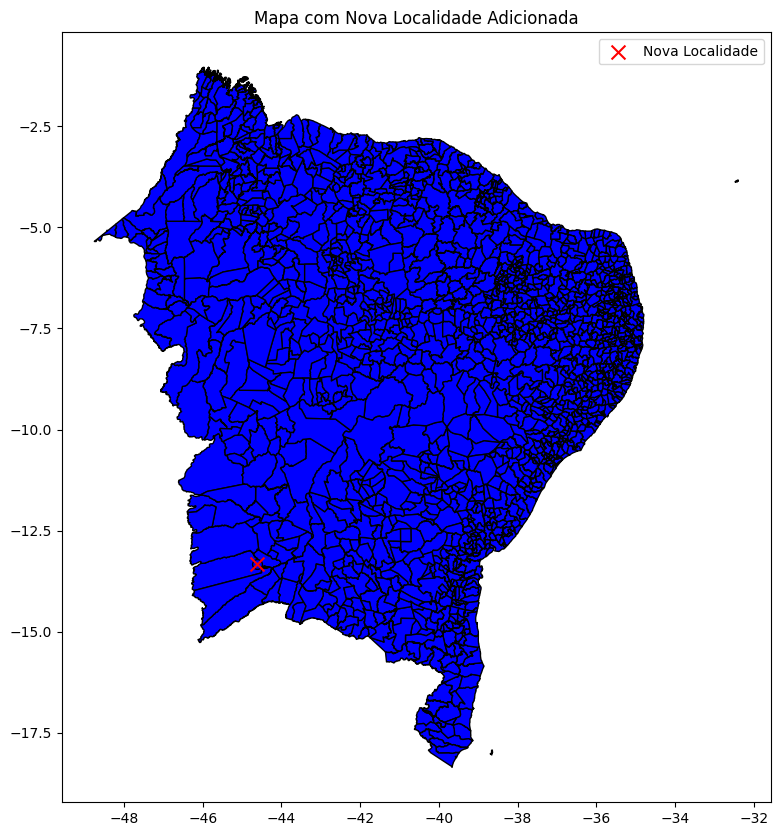

In [ ]:
import matplotlib.pyplot as plt

# Plotar o GeoDataFrame combinado
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar todas as localidades no GeoDataFrame
gdf_combinado.plot(ax=ax, color='blue', marker='o', markersize=50, edgecolor='black')

# Destacar a nova localidade, assumindo que é o último registro
gdf_combinado.iloc[-1:].plot(ax=ax, color='red', marker='x', markersize=100, label='Nova Localidade')

# Ajustar o título e a legenda
plt.title('Mapa com Nova Localidade Adicionada')
plt.legend()

# Exibir o mapa
plt.show()

# bla

In [ ]:
# Defina o diretório onde estão os arquivos GEOJSON
diretorio = '/content/drive/MyDrive/TCC/DADOS/GeoJson'

# Obtenha a lista de todos os arquivos CSV no diretório
arquivos_json = [f for f in os.listdir(diretorio) if f.endswith('.json')]

arquivos_json

['RN.json',
 'PI.json',
 'PE.json',
 'PB.json',
 'MA.json',
 'CE.json',
 'BA.json',
 'AL.json',
 'SE.json']

In [ ]:
# Leio cada arquivo json e coloco na varável que representa respectivamente o seu estado

for arquivo in arquivos_json:
    #obtem o nome do arquivo sem a sua extensão e coloca na variável 'nome_df'
    nome_geojson = os.path.splitext(arquivo)[0]

    nome_geojson = gpd.read_file(os.path.join(diretorio, arquivo))

In [ ]:
# confirmo que a variável 'SE' contem as informações do arquivo SE.json
SE

,id,name,description,geometry
0,2800100,Amparo de São Francisco,Amparo de São Francisco,"POLYGON ((-36.92564 -10.12772, -36.92370 -10.1..."
1,2800209,Aquidabã,Aquidabã,"POLYGON ((-37.05706 -10.18066, -37.01656 -10.1..."
2,2800308,Aracaju,Aracaju,"POLYGON ((-37.07445 -10.86439, -37.06768 -10.8..."
3,2800407,Arauá,Arauá,"POLYGON ((-37.55427 -11.18342, -37.55017 -11.1..."
4,2800506,Areia Branca,Areia Branca,"POLYGON ((-37.31860 -10.73779, -37.31587 -10.7..."
...,...,...,...,...
70,2807204,Siriri,Siriri,"POLYGON ((-37.10365 -10.52838, -37.10684 -10.5..."
71,2807303,Telha,Telha,"POLYGON ((-36.84827 -10.16236, -36.84692 -10.1..."
72,2807402,Tobias Barreto,Tobias Barreto,"POLYGON ((-38.02596 -10.81536, -37.96990 -10.8..."
73,2807501,Tomar do Geru,Tomar do Geru,"POLYGON ((-37.92704 -11.25202, -37.91768 -11.2..."


In [ ]:
# Concatenar os GeoDataFrames em um único GeoDataFrame
gdf_nordeste = gpd.GeoDataFrame(pd.concat([SE,RN,PI,PE,PB,MA,CE,BA,AL], ignore_index=True))

In [ ]:
# Salvar o GeoDataFrame resultante em um novo arquivo GeoJSON
gdf_nordeste.to_file('/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson', driver='GeoJSON')

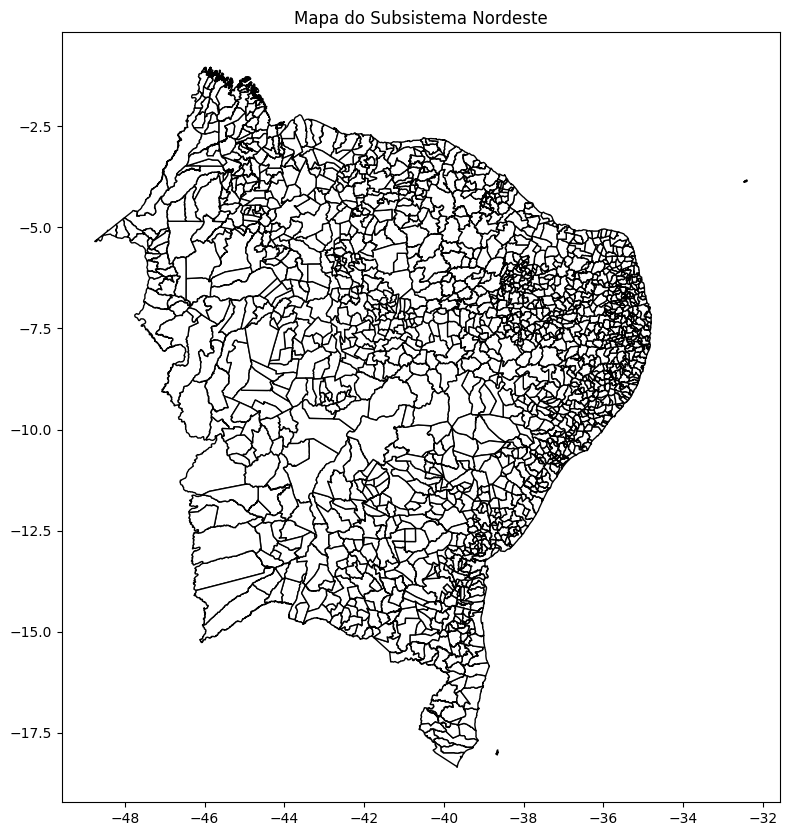

In [ ]:
# Plotar o GeoDataFrame combinado
fig, ax = plt.subplots(figsize=(10, 10))
gdf_nordeste.plot(ax=ax, color='white', edgecolor='black')
plt.title('Mapa do Subsistema Nordeste')
plt.show()

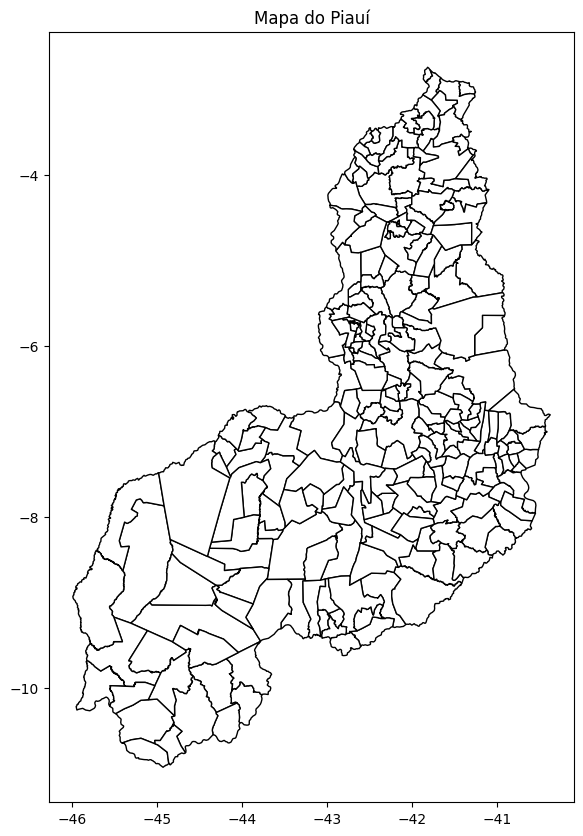

In [ ]:
# plotando piaui

fig, ax = plt.subplots(figsize=(10, 10))
PI.plot(ax=ax, color='white', edgecolor='black')
plt.title('Mapa do Piauí')
plt.show()

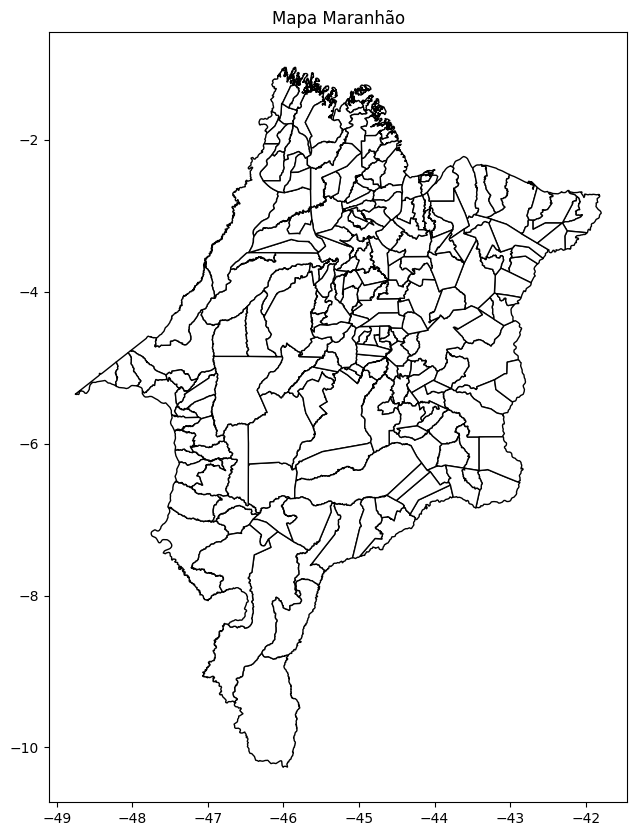

In [ ]:
# plotando maranhão

fig, ax = plt.subplots(figsize=(10, 10))
MA.plot(ax=ax, color='white', edgecolor='black')
plt.title('Mapa Maranhão')
plt.show()